<a href="https://colab.research.google.com/github/c4bath/cf820/blob/main/PatSurvLogRegNov3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv(r'/content/drive/MyDrive/CIND820BigProject/Data/PatSurvRaw.csv',header=0)

In [5]:
print(data.shape)
print(list(data.columns))

(91713, 186)
['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasi

In [6]:
# Eliminate features that do not provide any information value (i.e. 'encounter_id', 'patient_id', 'apache_4a_hospital_death_prob','apache_4a_icu_death_prob') OR are not of interest in our prediction and analysis (the physiological measures, i.e. 'bilirubin_apache','bun_apache','creatinine_apache', etc)
data.drop(['encounter_id','patient_id','readmission_status', 'icu_id','albumin_apache','apache_2_diagnosis','apache_3j_diagnosis','apache_post_operative','arf_apache','bilirubin_apache','bun_apache','creatinine_apache','fio2_apache','glucose_apache','heart_rate_apache','hematocrit_apache','map_apache','paco2_apache','paco2_for_ph_apache','pao2_apache','ph_apache','resprate_apache','sodium_apache','temp_apache','urineoutput_apache','wbc_apache','d1_diasbp_invasive_max','d1_diasbp_invasive_min','d1_diasbp_max','d1_diasbp_min','d1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min','d1_heartrate_max','d1_heartrate_min','d1_mbp_invasive_max','d1_mbp_invasive_min','d1_mbp_max','d1_mbp_min','d1_mbp_noninvasive_max','d1_mbp_noninvasive_min','d1_resprate_max','d1_resprate_min','d1_spo2_max','d1_spo2_min','d1_sysbp_invasive_max','d1_sysbp_invasive_min','d1_sysbp_max','d1_sysbp_min','d1_sysbp_noninvasive_max','d1_sysbp_noninvasive_min','d1_temp_max','d1_temp_min','h1_diasbp_invasive_max','h1_diasbp_invasive_min','h1_diasbp_max','h1_diasbp_min','h1_diasbp_noninvasive_max','h1_diasbp_noninvasive_min','h1_heartrate_max','h1_heartrate_min','h1_mbp_invasive_max','h1_mbp_invasive_min','h1_mbp_max','h1_mbp_min','h1_mbp_noninvasive_max','h1_mbp_noninvasive_min','h1_resprate_max','h1_resprate_min','h1_spo2_max','h1_spo2_min','h1_sysbp_invasive_max','h1_sysbp_invasive_min','h1_sysbp_max','h1_sysbp_min','h1_sysbp_noninvasive_max','h1_sysbp_noninvasive_min','h1_temp_max','h1_temp_min','d1_albumin_max','d1_albumin_min','d1_bilirubin_max','d1_bilirubin_min','d1_bun_max','d1_bun_min','d1_calcium_max','d1_calcium_min','d1_creatinine_max','d1_creatinine_min','d1_glucose_max','d1_glucose_min','d1_hco3_max','d1_hco3_min','d1_hemaglobin_max','d1_hemaglobin_min','d1_hematocrit_max','d1_hematocrit_min','d1_inr_max','d1_inr_min','d1_lactate_max','d1_lactate_min','d1_platelets_max','d1_platelets_min','d1_potassium_max','d1_potassium_min','d1_sodium_max','d1_sodium_min','d1_wbc_max','d1_wbc_min','h1_albumin_max','h1_albumin_min','h1_bilirubin_max','h1_bilirubin_min','h1_bun_max','h1_bun_min','h1_calcium_max','h1_calcium_min','h1_creatinine_max','h1_creatinine_min','h1_glucose_max','h1_glucose_min','h1_hco3_max','h1_hco3_min','h1_hemaglobin_max','h1_hemaglobin_min','h1_hematocrit_max','h1_hematocrit_min','h1_inr_max','h1_inr_min','h1_lactate_max','h1_lactate_min','h1_platelets_max','h1_platelets_min','h1_potassium_max','h1_potassium_min','h1_sodium_max','h1_sodium_min','h1_wbc_max','h1_wbc_min','d1_arterial_pco2_max','d1_arterial_pco2_min','d1_arterial_ph_max','d1_arterial_ph_min','d1_arterial_po2_max','d1_arterial_po2_min','d1_pao2fio2ratio_max','d1_pao2fio2ratio_min','h1_arterial_pco2_max','h1_arterial_pco2_min','h1_arterial_ph_max','h1_arterial_ph_min','h1_arterial_po2_max','h1_arterial_po2_min','h1_pao2fio2ratio_max','h1_pao2fio2ratio_min','apache_4a_hospital_death_prob','apache_4a_icu_death_prob'],axis =1, inplace = True)

In [7]:
data.shape

(91713, 30)

In [8]:
#Drop rows that have missing values in more than 2 columns
#df=df.dropna(thresh=len(df.columns)-2)
data=data.dropna(thresh=29)

In [9]:
data.shape

(84664, 30)

In [10]:
#drop the following features (reason)
#hospital_admit_source (over 20K missing values)
# i. weight and ii. height (these are both highly correlated with bmi, which is calculated as weigh(kg) / height(meters squared)
# apache_2_bodysystem (superseded by apache_3j_bodysystem)
data.drop(['hospital_admit_source','weight','height','apache_2_bodysystem'],axis =1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
#Impute missing quantitative variables with the mean
df1 = data
df1['age']=df1['age'].fillna(df1['age'].mean())
df1['bmi']=df1['bmi'].fillna(df1['bmi'].mean())
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84664 entries, 0 to 91712
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hospital_id                  84664 non-null  int64  
 1   hospital_death               84664 non-null  int64  
 2   age                          84664 non-null  float64
 3   bmi                          84664 non-null  float64
 4   elective_surgery             84664 non-null  int64  
 5   ethnicity                    83604 non-null  object 
 6   gender                       84661 non-null  object 
 7   icu_admit_source             84663 non-null  object 
 8   icu_stay_type                84664 non-null  object 
 9   icu_type                     84664 non-null  object 
 10  pre_icu_los_days             84664 non-null  float64
 11  gcs_eyes_apache              84664 non-null  float64
 12  gcs_motor_apache             84664 non-null  float64
 13  gcs_unable_apach

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
#Impute missing categorical variables with the mode
df1=df1.fillna(df1.mode().iloc[0])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84664 entries, 0 to 91712
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hospital_id                  84664 non-null  int64  
 1   hospital_death               84664 non-null  int64  
 2   age                          84664 non-null  float64
 3   bmi                          84664 non-null  float64
 4   elective_surgery             84664 non-null  int64  
 5   ethnicity                    84664 non-null  object 
 6   gender                       84664 non-null  object 
 7   icu_admit_source             84664 non-null  object 
 8   icu_stay_type                84664 non-null  object 
 9   icu_type                     84664 non-null  object 
 10  pre_icu_los_days             84664 non-null  float64
 11  gcs_eyes_apache              84664 non-null  float64
 12  gcs_motor_apache             84664 non-null  float64
 13  gcs_unable_apach

In [13]:
data=df1
data['hospital_death'].value_counts()

0    77609
1     7055
Name: hospital_death, dtype: int64

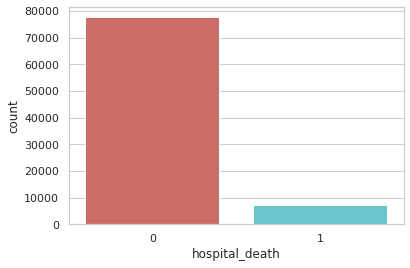

<Figure size 432x288 with 0 Axes>

In [14]:
sns.countplot(x='hospital_death',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [15]:
count_no_died = len(data[data['hospital_death']==0])
count_died = len(data[data['hospital_death']==1])
pct_of_no_died = count_no_died/(count_no_died+count_died)
print("percentage of did not die is", pct_of_no_died*100)
pct_of_died = count_died/(count_no_died+count_died)
print("percentage of died", pct_of_died*100)

percentage of did not die is 91.66706037985448
percentage of died 8.332939620145515


Our classes are imbalanced, and the ratio of did not die to died instances is 92:8. Before we go ahead to balance the classes, let’s do some more exploration.

In [16]:
data.groupby('hospital_death').mean()

,hospital_id,age,bmi,elective_surgery,pre_icu_los_days,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
hospital_death,,,,,,,,,,,,,,,,,,,
0,105.956770,61.823112,29.288967,0.193109,0.786659,3.535105,5.576776,0.0,4.100555,0.130591,0.291255,0.000825,0.014367,0.229290,0.011867,0.024301,0.006365,0.003917,0.018696
1,105.631892,68.232666,28.362988,0.067470,1.380118,2.648618,4.277250,0.0,2.752799,0.352799,0.670872,0.001417,0.033451,0.207654,0.028774,0.050744,0.016159,0.008505,0.045358


In [17]:
data.groupby('elective_surgery').mean()

,hospital_id,hospital_death,age,bmi,pre_icu_los_days,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
elective_surgery,,,,,,,,,,,,,,,,,,,
0,104.248768,0.095071,61.818866,29.161940,0.686830,3.459502,5.462522,0.0,4.004321,0.121183,0.288796,0.000968,0.017875,0.227453,0.015159,0.027572,0.007861,0.004581,0.019855
1,113.452306,0.030783,64.766476,29.434969,1.504186,3.468990,5.495182,0.0,3.916316,0.274074,0.475458,0.000453,0.007372,0.227640,0.004850,0.021729,0.004139,0.003040,0.025674


In [18]:
data.groupby('intubated_apache').mean()

,hospital_id,hospital_death,age,bmi,elective_surgery,pre_icu_los_days,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
intubated_apache,,,,,,,,,,,,,,,,,,,
0.0,105.172376,0.063381,62.248607,29.088312,0.155816,0.781786,3.619892,5.664159,0.0,4.285966,0.204234,0.000805,0.015700,0.227332,0.013145,0.027124,0.007288,0.004414,0.021627
1.0,110.251426,0.197164,62.977006,29.916535,0.335710,1.146129,2.555846,4.351869,0.0,2.289290,1.000000,0.001267,0.017427,0.228375,0.014021,0.022972,0.006575,0.003644,0.016873


In [19]:
data.groupby('ventilated_apache').mean()

,hospital_id,hospital_death,age,bmi,elective_surgery,pre_icu_los_days,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,intubated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
ventilated_apache,,,,,,,,,,,,,,,,,,,
0.0,104.499363,0.040504,61.869232,28.805309,0.141487,0.687665,3.784988,5.857502,0.0,4.601968,0.000000,0.000768,0.016310,0.224292,0.013728,0.026916,0.007292,0.004413,0.022485
1.0,108.929180,0.173135,63.380543,30.064249,0.268940,1.147411,2.782310,4.652705,0.0,2.701247,0.461792,0.001097,0.015217,0.234188,0.012328,0.025643,0.006950,0.004060,0.017632


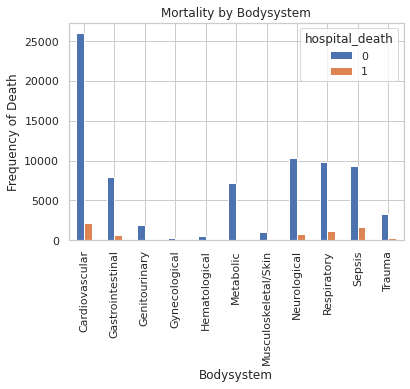

In [20]:
%matplotlib inline
pd.crosstab(data.apache_3j_bodysystem ,data.hospital_death).plot(kind='bar')
plt.title('Mortality by Bodysystem')
plt.xlabel('Bodysystem')
plt.ylabel('Frequency of Death')
plt.savefig('death_bodysystem')

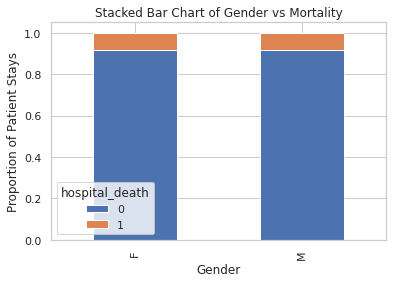

In [21]:
table=pd.crosstab(data.gender,data.hospital_death)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Gender vs Mortality')
plt.xlabel('Gender')
plt.ylabel('Proportion of Patient Stays')
plt.savefig('gender_vs_mort_stack')


In [22]:
cat_vars=['hospital_id','icu_type','ethnicity','gender','icu_admit_source','icu_stay_type','apache_3j_bodysystem']
for var in cat_vars:
  cat_list='var'+'_'+var
  cat_list=pd.get_dummies(data[var],
                          prefix=var)
  data1=data.join(cat_list)
  data=data1

cat_vars=['hospital_id','icu_type','ethnicity','gender','icu_admit_source','icu_stay_type','apache_3j_bodysystem']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]


In [23]:
data_final=data[to_keep]
data_final.columns.values

array(['hospital_death', 'age', 'bmi', 'elective_surgery',
       'pre_icu_los_days', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'intubated_apache',
       'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'hospital_id_2', 'hospital_id_3',
       'hospital_id_4', 'hospital_id_5', 'hospital_id_6', 'hospital_id_8',
       'hospital_id_9', 'hospital_id_10', 'hospital_id_13',
       'hospital_id_14', 'hospital_id_15', 'hospital_id_16',
       'hospital_id_17', 'hospital_id_18', 'hospital_id_19',
       'hospital_id_20', 'hospital_id_21', 'hospital_id_23',
       'hospital_id_24', 'hospital_id_26', 'hospital_id_27',
       'hospital_id_29', 'hospital_id_30', 'hospital_id_31',
       'hospital_id_32', 'hospital_id_33', 'hospital_id_34',
       'hospital_id_35', 'hospital_id_36', 'hospital_id_37',
       'hospital_id_38', 'hospi

In [24]:
data_final.shape

(84664, 201)

In [25]:
data_final.head(15)

,hospital_death,age,bmi,elective_surgery,pre_icu_los_days,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,intubated_apache,...,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma
0,0,68.0,22.730000,0,0.541667,3.0,6.0,0.0,4.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0,77.0,27.420000,0,0.927778,1.0,3.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,0,25.0,31.950000,0,0.000694,3.0,6.0,0.0,5.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,0,81.0,22.640000,1,0.000694,4.0,6.0,0.0,5.0,1.0,...,0,0,0,0,0,0,0,0,0,0
5,0,67.0,27.560000,0,0.000694,4.0,6.0,0.0,5.0,0.0,...,0,0,0,0,0,0,1,0,0,0
6,0,59.0,57.450000,0,0.000694,4.0,6.0,0.0,5.0,1.0,...,0,0,0,0,0,0,0,1,0,0
9,0,50.0,25.710000,0,0.060417,4.0,6.0,0.0,5.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10,0,72.0,28.257052,1,0.004861,4.0,6.0,0.0,5.0,0.0,...,0,0,0,0,0,0,0,1,0,0
11,0,80.0,27.382812,1,1.271528,4.0,6.0,0.0,4.0,0.0,...,0,0,0,0,0,0,1,0,0,0
14,0,81.0,38.189067,1,1.376389,4.0,6.0,0.0,5.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
# Over-sampling using SMOTE

X = data_final.loc[:, data_final.columns != 'hospital_death']
y = data_final.loc[:, data_final.columns == 'hospital_death']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['hospital_death'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of patient did not die in oversampled data",len(os_data_y[os_data_y['hospital_death']==0]))
print("Number of patient died",len(os_data_y[os_data_y['hospital_death']==1]))
print("Proportion of patient did not die data in oversampled data is ",len(os_data_y[os_data_y['hospital_death']==0])/len(os_data_X))
print("Proportion of patient died data in oversampled data is ",len(os_data_y[os_data_y['hospital_death']==1])/len(os_data_X))

length of oversampled data is  108614
Number of patient did not die in oversampled data 54307
Number of patient died 54307
Proportion of patient did not die data in oversampled data is  0.5
Proportion of patient died data in oversampled data is  0.5


In [27]:
#Splitting the dataset into the traing set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=0)

In [28]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [29]:
X_train.head(5)

,age,bmi,elective_surgery,pre_icu_los_days,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,...,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma
48327,0.220057,4.534953,-0.470943,-0.323759,0.564021,0.412051,0.0,0.647198,-0.418657,-0.690515,...,-0.335731,-0.157131,-0.058117,-0.084395,-0.305623,-0.113003,-0.389024,-0.386883,2.585436,-0.210659
52403,-0.022095,0.096521,2.123399,0.558811,0.564021,0.412051,0.0,0.647198,-0.418657,1.448194,...,-0.335731,-0.157131,-0.058117,-0.084395,-0.305623,-0.113003,-0.389024,-0.386883,-0.386782,-0.210659
69160,-0.930165,-0.925445,-0.470943,-0.331097,-0.483089,0.412051,0.0,0.647198,-0.418657,-0.690515,...,-0.335731,-0.157131,-0.058117,-0.084395,-0.305623,-0.113003,2.570537,-0.386883,-0.386782,-0.210659
16023,-0.566937,4.659222,2.123399,-0.279440,0.564021,0.412051,0.0,0.647198,-0.418657,-0.690515,...,2.978571,-0.157131,-0.058117,-0.084395,-0.305623,-0.113003,-0.389024,-0.386883,-0.386782,-0.210659
58442,-1.414469,1.450332,-0.470943,-0.284430,0.564021,0.412051,0.0,0.008961,-0.418657,-0.690515,...,-0.335731,-0.157131,-0.058117,-0.084395,-0.305623,-0.113003,-0.389024,-0.386883,2.585436,-0.210659


In [30]:
X_test.head(5)

,age,bmi,elective_surgery,pre_icu_los_days,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,...,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma
5412,0.098981,-0.101205,2.123399,-0.238056,0.564021,-0.362952,0.0,0.647198,-0.418657,-0.690515,...,-0.335731,-0.157131,-0.058117,-0.084395,-0.305623,8.849311,-0.389024,-0.386883,-0.386782,-0.210659
59797,-1.172317,0.053301,-0.470943,-0.353697,0.564021,0.412051,0.0,0.647198,-0.418657,-0.690515,...,-0.335731,-0.157131,-0.058117,-0.084395,-0.305623,-0.113003,-0.389024,-0.386883,-0.386782,-0.210659
22501,1.128127,-0.181405,2.123399,-0.346359,-0.483089,0.412051,0.0,-1.905750,2.388593,1.448194,...,-0.335731,-0.157131,-0.058117,-0.084395,-0.305623,-0.113003,-0.389024,-0.386883,-0.386782,-0.210659
82941,1.188665,0.737403,2.123399,0.047525,-1.530199,0.412051,0.0,-1.905750,2.388593,1.448194,...,-0.335731,-0.157131,-0.058117,-0.084395,-0.305623,-0.113003,-0.389024,-0.386883,-0.386782,-0.210659
58302,-0.930165,0.193897,-0.470943,-0.318476,0.564021,0.412051,0.0,0.647198,2.388593,1.448194,...,-0.335731,-0.157131,-0.058117,-0.084395,-0.305623,-0.113003,-0.389024,-0.386883,-0.386782,-0.210659


In [31]:
data_final_vars=data_final.columns.values.tolist()
y=['hospital_death']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select= 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [32]:
print(rfe.support_)
print(rfe.ranking_)
os_data_X.columns[rfe.support_]

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

Index(['icu_type_CCU-CTICU', 'icu_type_CSICU', 'icu_type_CTICU',
       'icu_type_Cardiac ICU', 'icu_type_MICU', 'icu_type_Med-Surg ICU',
       'icu_type_Neuro ICU', 'icu_type_SICU', 'gender_F', 'gender_M',
       'apache_3j_bodysystem_Cardiovascular',
       'apache_3j_bodysystem_Gastrointestinal',
       'apache_3j_bodysystem_Genitourinary',
       'apache_3j_bodysystem_Gynecological',
       'apache_3j_bodysystem_Hematological', 'apache_3j_bodysystem_Metabolic',
       'apache_3j_bodysystem_Musculoskeletal/Skin',
       'apache_3j_bodysystem_Neurological', 'apache_3j_bodysystem_Respiratory',
       'apache_3j_bodysystem_Trauma'],
      dtype='object')

In [33]:
os_data_X.columns[rfe.ranking_]

Index(['hospital_id_198', 'ethnicity_Caucasian', 'hospital_id_185',
       'hospital_id_199', 'icu_type_CCU-CTICU', 'hospital_id_192',
       'icu_admit_source_Accident & Emergency', 'icu_type_SICU',
       'hospital_id_197', 'hospital_id_184',
       ...
       'bmi', 'bmi', 'bmi', 'bmi', 'bmi', 'bmi', 'bmi', 'bmi',
       'elective_surgery', 'bmi'],
      dtype='object', length=200)

In [34]:
cols=['icu_type_CCU-CTICU', 'icu_type_CSICU', 'icu_type_CTICU',
       'icu_type_Cardiac ICU', 'icu_type_MICU', 'icu_type_Med-Surg ICU',
       'icu_type_Neuro ICU', 'icu_type_SICU', 'gender_F', 'gender_M',
       'apache_3j_bodysystem_Cardiovascular',
       'apache_3j_bodysystem_Gastrointestinal',
       'apache_3j_bodysystem_Genitourinary',
       'apache_3j_bodysystem_Gynecological',
       'apache_3j_bodysystem_Hematological', 'apache_3j_bodysystem_Metabolic',
       'apache_3j_bodysystem_Musculoskeletal/Skin',
       'apache_3j_bodysystem_Neurological', 'apache_3j_bodysystem_Respiratory',
       'apache_3j_bodysystem_Trauma']
X=os_data_X[cols]
y=os_data_y['hospital_death']


In [35]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.551032
         Iterations 9
                                      Results: Logit
Model:                      Logit                    Pseudo R-squared:         0.205      
Dependent Variable:         hospital_death           AIC:                      119739.5682
Date:                       2022-11-05 14:58         BIC:                      119931.4794
No. Observations:           108614                   Log-Likelihood:           -59850.    
Df Model:                   19                       LL-Null:                  -75285.    
Df Residuals:               108594                   LLR p-value:              0.0000     
Converged:                  1.0000                   Scale:                    1.0000     
No. Iterations:             9.0000                                                        
------------------------------------------------------------------------------------------
                          

In [ ]:
cols=['icu_type_CCU-CTICU', 'icu_type_CSICU', 'icu_type_CTICU',
       'icu_type_Cardiac ICU', 'icu_type_MICU', 'icu_type_Med-Surg ICU',
       'icu_type_Neuro ICU', 'icu_type_SICU', 'gender_F', 'gender_M',
       'apache_3j_bodysystem_Cardiovascular',
       'apache_3j_bodysystem_Gastrointestinal',
       'apache_3j_bodysystem_Genitourinary',
       'apache_3j_bodysystem_Gynecological',
       'apache_3j_bodysystem_Hematological', 'apache_3j_bodysystem_Metabolic',
       'apache_3j_bodysystem_Musculoskeletal/Skin',
       'apache_3j_bodysystem_Neurological', 'apache_3j_bodysystem_Respiratory',
       'apache_3j_bodysystem_Trauma']
X=os_data_X[cols]
y=os_data_y['hospital_death']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [38]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[14536  1677]
 [ 2457 13915]]


The result is telling us that we have 14536+13915 correct predictions and 2457+1677 incorrect predictions.

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     16213
           1       0.89      0.85      0.87     16372

    accuracy                           0.87     32585
   macro avg       0.87      0.87      0.87     32585
weighted avg       0.87      0.87      0.87     32585



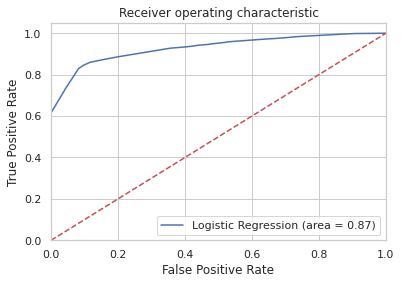

In [41]:
# AUROC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()